In [1]:
import matplotlib.pyplot as plt
import numpy  as np
import xarray as xr

In [2]:
# filtrat a 5km
# rmsd_adcp_swot = 8.198939478070494	
# rmsd_adcp_duacs = 13.82880267998922
# percent_improv_adcp = 40.71113987377477

# filtrat a 15 km
rmsd_adcp_swot = 8.139525902062812	
rmsd_adcp_duacs = 13.800466285022206
percent_improv_adcp = 41.019921110225624


rmsd_gli_swot= 0.552	
rmsd_gli_duacs = 0.822	
percent_improv_gli = 32.84671532847

In [3]:
# Grouping the data
rmsd = [rmsd_gli_duacs, rmsd_adcp_duacs]
rmsd_swot = [rmsd_gli_swot, rmsd_adcp_swot]
percent_improv = [percent_improv_gli, percent_improv_adcp]

# Labels
labels = ['GLI [cm]', 'ADCP [cm/s]']

In [4]:
rmsd_swot_u = 6.31 #5.9 #cm/s
rmsd_swot_v = 7.76 #7.4 #cm/s
rmsd_duacs_u = 8.5 #8.49 #cm/s
rmsd_duacs_v = 10.20 #10.02 #cm/s
rmsd_swot_modul = 7.03
rmsd_duacs_modul = 12.62
rmsd_swot_dir = 36.118
rmsd_duacs_dir = 40.0195

In [5]:
percent_improv_u = 100*(rmsd_duacs_u - rmsd_swot_u)/rmsd_duacs_u
percent_improv_v = 100*(rmsd_duacs_v - rmsd_swot_v)/rmsd_duacs_v
percent_improv_modul = 100*(rmsd_duacs_modul - rmsd_swot_modul)/rmsd_duacs_modul
percent_improv_dir = 100*(rmsd_duacs_dir - rmsd_swot_dir)/rmsd_duacs_dir

/tmp/ipykernel_171632/3803398244.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax4.legend()


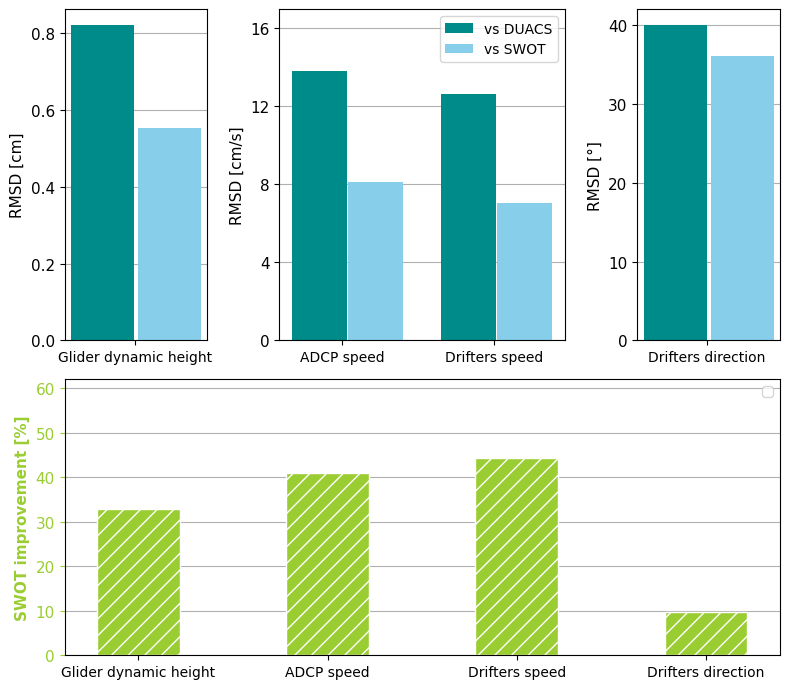

In [6]:
# Create the figure with a 2x3 grid (3 subplots in the first row and 1 in the second)
fig = plt.figure(figsize=(8, 7))

# Use gridspec for custom layout (first row with 3 subplots, second row with 1 subplot spanning all columns)
gs = fig.add_gridspec(2, 3, height_ratios=[1.2, 1],width_ratios=[1, 2, 1])

# First row (3 subplots):
ax1 = fig.add_subplot(gs[0, 0])  # First subplot (RMSD DH Gliders)
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot (Velocities of ADCP and drifters)
ax3 = fig.add_subplot(gs[0, 2])  # Third subplot (RMSD direction of drifters)

# Second row (1 subplot):
ax4 = fig.add_subplot(gs[1, :])  # Single large subplot for % improvements across the whole width

# First row: Subplot 1: RMSD DH Gliders
x = np.array([0])  # Single category
width = 0.25
ax1.bar(x + 0.05, rmsd[0], width / 3.2, label='vs DUACS', color='darkcyan', zorder=2)
ax1.bar(x + 0.133, rmsd_swot[0], width / 3.2, label='vs SWOT', color='skyblue', zorder=2)
# y axis label
ax1.set_ylabel('RMSD [cm]', fontsize=11)
ax1.set_xticks([0.09])
ax1.set_xticklabels(['Glider dynamic height'], fontsize=10)
ax1.yaxis.set_ticks(np.arange(0, 0.9, 0.2))
ax1.yaxis.grid(True)
ax1.tick_params(axis='y', labelsize=11)

# First row: Subplot 2: Velocities RMSD (ADCP & Drifters)
ax2.bar(x + 0.07, rmsd[1], width * 1.3, label='vs DUACS', color='darkcyan', zorder=2)
ax2.bar(x + 0.4, rmsd_swot[1], width * 1.3, label='vs SWOT', color='skyblue', zorder=2)
ax2.bar(x + 0.95, rmsd_duacs_modul, width * 1.3, color='darkcyan', zorder=2)
ax2.bar(x + 1.28, rmsd_swot_modul, width * 1.3, color='skyblue', zorder=2)

ax2.set_ylabel('RMSD [cm/s]', fontsize=11)
ax2.set_xticks([0.2, 1.1])
ax2.set_xticklabels(['ADCP speed', 'Drifters speed'], fontsize=10)
ax2.yaxis.set_ticks(np.arange(0, 17, 4))
ax2.set_ylim([0,17])
ax2.yaxis.grid(True)
ax2.tick_params(axis='y', labelsize=11)
ax2.legend(fontsize='medium')

# First row: Subplot 3: RMSD bars (Dir. Drifters)
ax3.bar(x + 1.65, rmsd_duacs_dir, width * 1.2, color='darkcyan', zorder=2)
ax3.bar(x + 1.97, rmsd_swot_dir, width * 1.2, color='skyblue', zorder=2)

ax3.yaxis.set_ticks(np.arange(0, 50, 10))
ax3.set_ylabel('RMSD [°]', fontsize=11)
ax3.set_xticks([1.8])
ax3.set_xticklabels(['Drifters direction'], fontsize=10)
ax3.tick_params(axis='y', labelsize=11)
ax3.yaxis.grid(True)


# Second row: Subplot for % improvements
ax4.bar(x + 1.2, percent_improv[0], width * 1.4, color='yellowgreen', zorder=2, edgecolor='white', hatch='//')
ax4.bar(x + 2, percent_improv[1], width * 1.4, color='yellowgreen', zorder=2, edgecolor='white', hatch='//')
ax4.bar(x + 2.8, percent_improv_modul, width * 1.4, color='yellowgreen', zorder=2, edgecolor='white', hatch='//')
ax4.bar(x + 3.6, percent_improv_dir, width * 1.4, color='yellowgreen', zorder=2, edgecolor='white', hatch='//')
ax4.set_ylim(0, 62)
ax4.set_ylabel('SWOT improvement [%]', fontsize=11, color='yellowgreen', fontweight='bold')
#colors of the y ticks numbers
ax4.tick_params(axis='y', labelsize=11, color='yellowgreen', labelcolor='yellowgreen')

ax4.set_xticks([1.2, 2, 2.8, 3.6])
ax4.set_xticklabels(['Glider dynamic height', 'ADCP speed', 'Drifters speed', 'Drifters direction'], fontsize=10)
ax4.yaxis.grid(True)
ax4.legend()

plt.tight_layout()

# plt.savefig('rmsd_percent_improv_v7.png', dpi=300)

plt.show()

# version 2

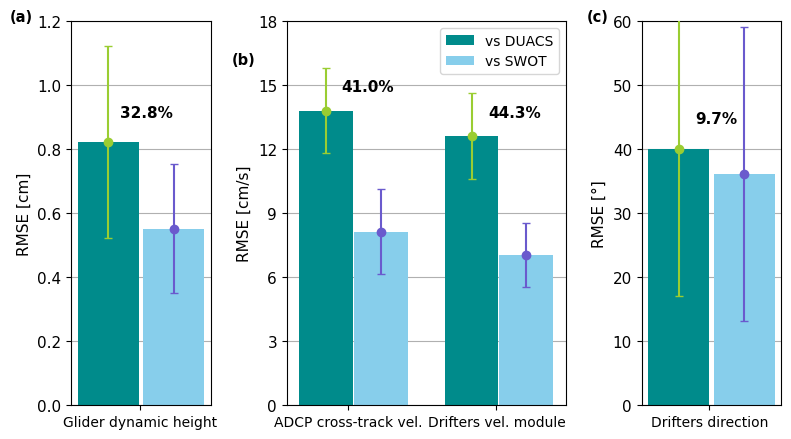

In [7]:
# Create the figure with a 2x3 grid (3 subplots in the first row and 1 in the second)
fig = plt.figure(figsize=(8, 4.5))

# Use gridspec for custom layout (first row with 3 subplots, second row with 1 subplot spanning all columns)
gs = fig.add_gridspec(1, 3,width_ratios=[1, 2, 1])

# First row (3 subplots):
ax1 = fig.add_subplot(gs[0, 0])  # First subplot (RMSD DH Gliders)
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot (Velocities of ADCP and drifters)
ax3 = fig.add_subplot(gs[0, 2])  # Third subplot (RMSD direction of drifters)

# First row: Subplot 1: RMSD DH Gliders
x = np.array([0])  # Single category
width = 0.25
ax1.bar(x + 0.05, rmsd[0], width / 3.2, label='vs DUACS', color='darkcyan', zorder=2)
ax1.errorbar(x + 0.05, rmsd[0], yerr=0.3, fmt='o', color='yellowgreen', zorder=3, capsize=3)

ax1.bar(x + 0.133, rmsd_swot[0], width / 3.2, label='vs SWOT', color='skyblue', zorder=2)
ax1.errorbar(x + 0.133, rmsd_swot[0], yerr=0.2, fmt='o', color='slateblue', zorder=3, capsize=3)

# y axis label
ax1.set_ylabel('RMSE [cm]', fontsize=11)
ax1.set_xticks([0.09])
ax1.set_xticklabels(['Glider dynamic height'], fontsize=10)
ax1.yaxis.set_ticks(np.arange(0, 1.4, 0.2))
ax1.yaxis.grid(True)
ax1.tick_params(axis='y', labelsize=11)
ax1.set_ylim([0,1.2])

# First row: Subplot 2: Velocities RMSD (ADCP & Drifters)
ax2.bar(x + 0.07, rmsd[1], width * 1.3, label='vs DUACS', color='darkcyan', zorder=2)
ax2.errorbar(x + 0.07, rmsd[1], yerr=2, fmt='o', color='yellowgreen', zorder=3, capsize=3)

ax2.bar(x + 0.4, rmsd_swot[1], width * 1.3, label='vs SWOT', color='skyblue', zorder=2)
ax2.errorbar(x + 0.4, rmsd_swot[1], yerr=2, fmt='o', color='slateblue', zorder=3, capsize=3)

ax2.bar(x + 0.95, rmsd_duacs_modul, width * 1.3, color='darkcyan', zorder=2)
ax2.errorbar(x + 0.95, rmsd_duacs_modul, yerr=2, fmt='o', color='yellowgreen', zorder=3, capsize=3)# add confidence interval to this bar

ax2.bar(x + 1.28, rmsd_swot_modul, width * 1.3, color='skyblue', zorder=2)
ax2.errorbar(x + 1.28, rmsd_swot_modul, yerr=1.5, fmt='o', color='slateblue', zorder=3, capsize=3)

ax2.set_ylabel('RMSE [cm/s]', fontsize=11)
ax2.set_xticks([0.2, 1.1])
ax2.set_xticklabels(['ADCP cross-track vel.', 'Drifters vel. module'], fontsize=10)
ax2.yaxis.set_ticks(np.arange(0, 19, 3))
ax2.yaxis.grid(True)
ax2.tick_params(axis='y', labelsize=11)
ax2.legend(fontsize='medium')
ax2.set_ylim([0,18])


# First row: Subplot 3: RMSD bars (Dir. Drifters)
ax3.bar(x + 1.65, rmsd_duacs_dir, width * 1.2, color='darkcyan', zorder=2)
ax3.bar(x + 1.97, rmsd_swot_dir, width * 1.2, color='skyblue', zorder=2)

ax3.errorbar(x + 1.65, rmsd_duacs_dir, yerr=23, fmt='o', color='yellowgreen', zorder=3, capsize=3)
ax3.errorbar(x + 1.97, rmsd_swot_dir, yerr=23, fmt='o', color='slateblue', zorder=3, capsize=3)

ax3.yaxis.set_ticks(np.arange(0, 70, 10))
ax3.set_ylabel('RMSE [°]', fontsize=11)
ax3.set_xticks([1.8])
ax3.set_xticklabels(['Drifters direction'], fontsize=10)
ax3.tick_params(axis='y', labelsize=11)
ax3.yaxis.grid(True)

ax3.set_ylim([0,60])

# add text of % improvement
ax1.text(0.065, 0.9, f'{percent_improv_gli:.1f}%', fontsize=11, color='black', fontweight='bold')
ax2.text(0.16, 14.7, f'{percent_improv_adcp:.1f}%', fontsize=11, color='black', fontweight='bold')
ax2.text(1.05, 13.5, f'{percent_improv_modul:.1f}%', fontsize=11, color='black', fontweight='bold')
ax3.text(1.73, 44, f'{percent_improv_dir:.1f}%', fontsize=11, color='black', fontweight='bold')

# add a,b,c
ax1.text(-0.075, 1.2, '(a)', fontsize=10.5, color='black', fontweight='bold')
ax2.text(-0.5, 16, '(b)', fontsize=10.5, color='black', fontweight='bold')
ax3.text(1.2, 60, '(c)', fontsize=10.5, color='black', fontweight='bold')

plt.tight_layout()

# plt.savefig('rmsd_percent_improv_v9.png', dpi=300)

plt.show()

In [8]:
# separate ADCP data (tr 6 i els altres junts)

In [9]:
rmsd_adcp_swot_tr6 = 0.04588315815940996 *100
rmsd_adcp_duacs_tr6  = 0.12864628327257902 *100
percent_improv_adcp_tr6  = 64.33386414888368 

In [10]:
rmsd_adcp_swot_rep_tr = 0.08926424627386087 *100
rmsd_adcp_duacs_rep_tr = 0.1402224843185717 *100
percent_improv_adcp_rep_tr  =  36.34098931590652 

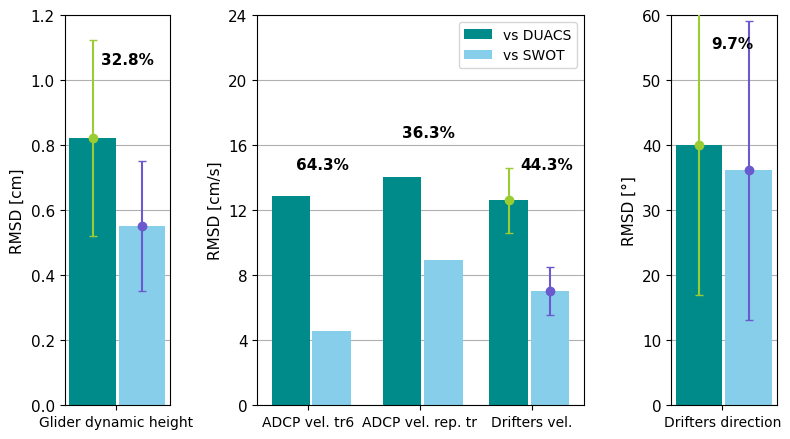

In [11]:
# Create the figure with a 2x3 grid (3 subplots in the first row and 1 in the second)
fig = plt.figure(figsize=(8, 4.5))

# Use gridspec for custom layout (first row with 3 subplots, second row with 1 subplot spanning all columns)
gs = fig.add_gridspec(1, 3,width_ratios=[1, 3.1, 1])

# First row (3 subplots):
ax1 = fig.add_subplot(gs[0, 0])  # First subplot (RMSD DH Gliders)
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot (Velocities of ADCP and drifters)
ax3 = fig.add_subplot(gs[0, 2])  # Third subplot (RMSD direction of drifters)

# First row: Subplot 1: RMSD DH Gliders
x = np.array([0])  # Single category
width = 0.25
ax1.bar(x + 0.05, rmsd[0], width / 3.2, label='vs DUACS', color='darkcyan', zorder=2)
ax1.errorbar(x + 0.05, rmsd[0], yerr=0.3, fmt='o', color='yellowgreen', zorder=3, capsize=3)

ax1.bar(x + 0.133, rmsd_swot[0], width / 3.2, label='vs SWOT', color='skyblue', zorder=2)
ax1.errorbar(x + 0.133, rmsd_swot[0], yerr=0.2, fmt='o', color='slateblue', zorder=3, capsize=3)

# y axis label
ax1.set_ylabel('RMSD [cm]', fontsize=11)
ax1.set_xticks([0.09])
ax1.set_xticklabels(['Glider dynamic height'], fontsize=10)
ax1.yaxis.set_ticks(np.arange(0, 1.4, 0.2))
ax1.yaxis.grid(True)
ax1.tick_params(axis='y', labelsize=11)
ax1.set_ylim([0,1.2])

# First row: Subplot 2: Velocities RMSD (ADCP & Drifters)

# ADCP tr 6
ax2.bar(x + 0.06, rmsd_adcp_duacs_tr6, width * 1.3, label='vs DUACS', color='darkcyan', zorder=2)
ax2.bar(x + 0.4, rmsd_adcp_swot_tr6, width * 1.3, label='vs SWOT', color='skyblue', zorder=2)

# ADCP rep tr
ax2.bar(x + 1, rmsd_adcp_duacs_rep_tr, width * 1.3, color='darkcyan', zorder=2)
ax2.bar(x + 1.35, rmsd_adcp_swot_rep_tr, width * 1.3, color='skyblue', zorder=2)

#DRIFTERS
ax2.bar(x + 1.9, rmsd_duacs_modul, width * 1.3, color='darkcyan', zorder=2)
# add confidence interval to this bar
ax2.errorbar(x + 1.9, rmsd_duacs_modul, yerr=2, fmt='o', color='yellowgreen', zorder=3, capsize=3)

ax2.bar(x + 2.25, rmsd_swot_modul, width * 1.3, color='skyblue', zorder=2)
ax2.errorbar(x + 2.25, rmsd_swot_modul, yerr=1.5, fmt='o', color='slateblue', zorder=3, capsize=3)


ax2.set_ylabel('RMSD [cm/s]', fontsize=11)
ax2.set_xticks([0.2, 1.15, 2.1])
ax2.set_xticklabels(['ADCP vel. tr6', 'ADCP vel. rep. tr', 'Drifters vel.'], fontsize=10)
ax2.yaxis.set_ticks(np.arange(0, 26, 4))
ax2.yaxis.grid(True)
ax2.tick_params(axis='y', labelsize=11)
ax2.legend(fontsize='medium')
ax2.set_ylim([0,24])


# First row: Subplot 3: RMSD bars (Dir. Drifters)
ax3.bar(x + 1.65, rmsd_duacs_dir, width * 1.2, color='darkcyan', zorder=2)
ax3.bar(x + 1.97, rmsd_swot_dir, width * 1.2, color='skyblue', zorder=2)

ax3.errorbar(x + 1.65, rmsd_duacs_dir, yerr=23, fmt='o', color='yellowgreen', zorder=3, capsize=3)
ax3.errorbar(x + 1.97, rmsd_swot_dir, yerr=23, fmt='o', color='slateblue', zorder=3, capsize=3)

ax3.yaxis.set_ticks(np.arange(0, 70, 10))
ax3.set_ylabel('RMSD [°]', fontsize=11)
ax3.set_xticks([1.8])
ax3.set_xticklabels(['Drifters direction'], fontsize=10)
ax3.tick_params(axis='y', labelsize=11)
ax3.yaxis.grid(True)

ax3.set_ylim([0,60])

# add text of % improvement
ax1.text(0.065, 1.05, f'{percent_improv_gli:.1f}%', fontsize=11, color='black', fontweight='bold')
ax2.text(0.1, 14.5, f'{percent_improv_adcp_tr6:.1f}%', fontsize=11, color='black', fontweight='bold')
ax2.text(1, 16.5, f'{percent_improv_adcp_rep_tr:.1f}%', fontsize=11, color='black', fontweight='bold')
ax2.text(2, 14.5, f'{percent_improv_modul:.1f}%', fontsize=11, color='black', fontweight='bold')
ax3.text(1.73, 55, f'{percent_improv_dir:.1f}%', fontsize=11, color='black', fontweight='bold')

plt.tight_layout()


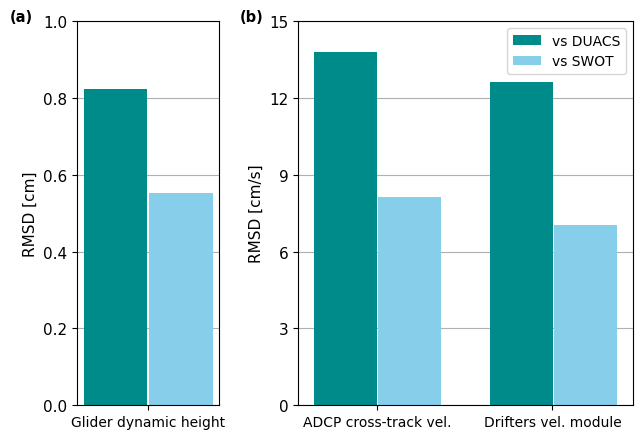

In [12]:
# Create the figure with a 2x3 grid (3 subplots in the first row and 1 in the second)
fig = plt.figure(figsize=(6.5, 4.5))

# Use gridspec for custom layout (first row with 3 subplots, second row with 1 subplot spanning all columns)
gs = fig.add_gridspec(1, 2,width_ratios=[0.85, 2])

# First row (3 subplots):
ax1 = fig.add_subplot(gs[0, 0])  # First subplot (RMSD DH Gliders)
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot (Velocities of ADCP and drifters)
# ax3 = fig.add_subplot(gs[0, 2])  # Third subplot (RMSD direction of drifters)

# First row: Subplot 1: RMSD DH Gliders
x = np.array([0])  # Single category
width = 0.25
ax1.bar(x + 0.051, rmsd[0], width / 3.3, label='vs DUACS', color='darkcyan', zorder=2)
# ax1.errorbar(x + 0.05, rmsd[0], yerr=0.3, fmt='o', color='yellowgreen', zorder=3, capsize=3)

ax1.bar(x + 0.13, rmsd_swot[0], width / 3.3, label='vs SWOT', color='skyblue', zorder=2)
# ax1.errorbar(x + 0.133, rmsd_swot[0], yerr=0.2, fmt='o', color='slateblue', zorder=3, capsize=3)

# y axis label
ax1.set_ylabel('RMSD [cm]', fontsize=11)
ax1.set_xticks([0.09])
ax1.set_xticklabels(['Glider dynamic height'], fontsize=10)
ax1.yaxis.set_ticks(np.arange(0, 1.4, 0.2))
ax1.yaxis.grid(True)
ax1.tick_params(axis='y', labelsize=11)
ax1.set_ylim([0,1])

# First row: Subplot 2: Velocities RMSD (ADCP & Drifters)
ax2.bar(x + 0.0382, rmsd[1], width * 1.3, label='vs DUACS', color='darkcyan', zorder=2)
# ax2.errorbar(x + 0.07, rmsd[1], yerr=2, fmt='o', color='yellowgreen', zorder=3, capsize=3)

ax2.bar(x + 0.368, rmsd_swot[1], width * 1.3, label='vs SWOT', color='skyblue', zorder=2)
# ax2.errorbar(x + 0.4, rmsd_swot[1], yerr=2, fmt='o', color='slateblue', zorder=3, capsize=3)

ax2.bar(x + 0.94, rmsd_duacs_modul, width * 1.3, color='darkcyan', zorder=2)
# ax2.errorbar(x + 0.95, rmsd_duacs_modul, yerr=2, fmt='o', color='yellowgreen', zorder=3, capsize=3)# add confidence interval to this bar

ax2.bar(x + 1.27, rmsd_swot_modul, width * 1.3, color='skyblue', zorder=2)
# ax2.errorbar(x + 1.28, rmsd_swot_modul, yerr=1.5, fmt='o', color='slateblue', zorder=3, capsize=3)

ax2.set_ylabel('RMSD [cm/s]', fontsize=11)
ax2.set_xticks([0.2, 1.1])
ax2.set_xticklabels(['ADCP cross-track vel.', 'Drifters vel. module'], fontsize=10)
ax2.yaxis.set_ticks(np.arange(0, 16, 3))
ax2.yaxis.grid(True)
ax2.tick_params(axis='y', labelsize=11)
ax2.legend(fontsize='medium')
ax2.set_ylim([0,15])


# First row: Subplot 3: RMSD bars (Dir. Drifters)
# ax3.bar(x + 1.65, rmsd_duacs_dir, width * 1.2, color='darkcyan', zorder=2)
# ax3.bar(x + 1.97, rmsd_swot_dir, width * 1.2, color='skyblue', zorder=2)

# ax3.errorbar(x + 1.65, rmsd_duacs_dir, yerr=23, fmt='o', color='yellowgreen', zorder=3, capsize=3)
# ax3.errorbar(x + 1.97, rmsd_swot_dir, yerr=23, fmt='o', color='slateblue', zorder=3, capsize=3)

# ax3.yaxis.set_ticks(np.arange(0, 70, 10))
# ax3.set_ylabel('RMSD [°]', fontsize=11)
# ax3.set_xticks([1.8])
# ax3.set_xticklabels(['Drifters direction'], fontsize=10)
# ax3.tick_params(axis='y', labelsize=11)
# ax3.yaxis.grid(True)

# ax3.set_ylim([0,60])

# add text of % improvement
# ax1.text(0.05, 0.85, f'{percent_improv_gli:.1f}% imp.', fontsize=11, color='black', fontweight='bold')
# ax2.text(0.16, 14.7, f'{percent_improv_adcp:.1f}%', fontsize=11, color='black', fontweight='bold')
# ax2.text(1.05, 13.5, f'{percent_improv_modul:.1f}%', fontsize=11, color='black', fontweight='bold')
# ax3.text(1.73, 44, f'{percent_improv_dir:.1f}%', fontsize=11, color='black', fontweight='bold')

# add a,b,c
ax1.text(-0.075, 1, '(a)', fontsize=10.5, color='black', fontweight='bold')
ax2.text(-0.5, 15, '(b)', fontsize=10.5, color='black', fontweight='bold')
# ax3.text(1.2, 60, '(c)', fontsize=10.5, color='black', fontweight='bold')

plt.tight_layout()

# plt.savefig('rmsd_percent_improv_v10.png', dpi=300)


## DEF



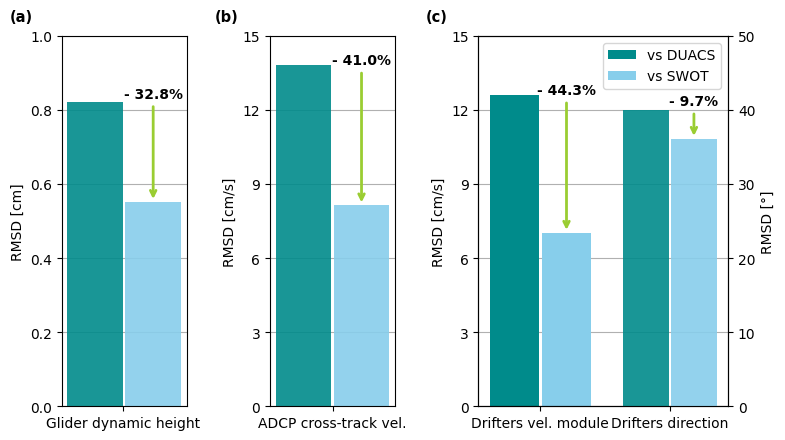

In [97]:
# Create the figure with a 2x3 grid (3 subplots in the first row and 1 in the second)
fig = plt.figure(figsize=(8, 4.5))

# Use gridspec for custom layout (first row with 3 subplots, second row with 1 subplot spanning all columns)
gs = fig.add_gridspec(1, 3,width_ratios=[1, 1, 2])

# First row (3 subplots):
ax1 = fig.add_subplot(gs[0, 0])  # First subplot (RMSD DH Gliders)
ax2 = fig.add_subplot(gs[0, 1])  # Second subplot (Velocities of ADCP and drifters)
ax3 = fig.add_subplot(gs[0, 2])  # Third subplot (RMSD direction of drifters)

# First row: Subplot 1: RMSD DH Gliders
x = np.array([0])  # Single category
width = 0.25
ax1.bar(x + 0.05, rmsd[0], width / 3.2, label='vs DUACS', color='darkcyan', zorder=2, alpha=0.9)

ax1.bar(x + 0.132, rmsd_swot[0], width / 3.2, label='vs SWOT', color='skyblue', zorder=2, alpha=0.9)

# y axis label
ax1.set_ylabel('RMSD [cm]', fontsize=10)
ax1.set_xticks([0.09])
ax1.set_xticklabels(['Glider dynamic height'], fontsize=10)
ax1.yaxis.set_ticks(np.arange(0, 1.4, 0.2))
ax1.yaxis.grid(True)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_ylim([0,1])

# Calculate the position of the second bar (SWOT)
bar_x = x[0] + 0.132  # x-position of the SWOT bar
bar_height = rmsd_swot[0]  # height of the SWOT bar
bar_reduction = 100 * (rmsd[0] - rmsd_swot[0]) / rmsd[0]  # percentage reduction

# Annotate with arrow and text
ax1.annotate(f'- {bar_reduction:.1f}%', 
             xy=(bar_x, bar_height), 
             xytext=(bar_x, bar_height + 0.28),
             textcoords='data',
             ha='center', 
             fontsize=10, fontweight='bold',
             arrowprops=dict(arrowstyle='->', lw=2, color='yellowgreen'))


# First row: Subplot 2: Velocities RMSD (ADCP & Drifters)
ax2.bar(x + 0.07, rmsd[1], width * 1.3, label='vs DUACS', color='darkcyan', zorder=2, alpha=0.9)

ax2.bar(x + 0.41, rmsd_swot[1], width * 1.3, label='vs SWOT', color='skyblue', zorder=2, alpha=0.9)

ax2.set_ylabel('RMSD [cm/s]', fontsize=10)

ax2.set_xticks([0.24])
ax2.set_xticklabels(['ADCP cross-track vel.'], fontsize=10)

ax2.yaxis.set_ticks(np.arange(0, 19, 3))
ax2.yaxis.grid(True)
ax2.tick_params(axis='y', labelsize=10)
ax2.set_ylim([0,15])

# Calculate the position of the second bar (SWOT)
bar_x = x[0] + 0.41  # x-position of the SWOT bar
bar_height = rmsd_swot[1]  # height of the SWOT bar
bar_reduction = 100 * (rmsd[1] - rmsd_swot[1]) / rmsd[1]  # percentage reduction
# Annotate with arrow and text
ax2.annotate(f'- {bar_reduction:.1f}%', 
             xy=(bar_x, bar_height), 
             xytext=(bar_x, bar_height + 5.7),
             textcoords='data',
             ha='center', 
             fontsize=10, fontweight='bold',
             arrowprops=dict(arrowstyle='->', lw=2, color='yellowgreen'))

# First row: Subplot 3: RMSD bars (Dir. Drifters)
# Create twin axis for dual y-axis
ax3_right = ax3.twinx()

# Left y-axis: RMSE [cm/s] for velocity module
ax3.bar(x + 0.03, rmsd_duacs_modul, width * 1.3, color='darkcyan', zorder=2, label='vs DUACS')
ax3.bar(x + 0.37, rmsd_swot_modul, width * 1.3, color='skyblue', zorder=2, label='vs SWOT')

ax3.set_ylabel('RMSD [cm/s]', fontsize=10, color='black')
ax3.yaxis.set_ticks(np.arange(0, 19, 3))
ax3.set_ylim([0, 15])
ax3.tick_params(axis='y', labelcolor='black', labelsize=10)

# calculate the position of the second bar (SWOT)
bar_x = x[0] + 0.37  # x-position of the SWOT bar
bar_height = rmsd_swot_modul  # height of the SWOT bar
bar_reduction = 100 * (rmsd_duacs_modul - rmsd_swot_modul) / rmsd_duacs_modul  # percentage reduction

# Annotate with arrow and text
ax3.annotate(f'- {bar_reduction:.1f}%', 
             xy=(bar_x, bar_height), 
             xytext=(bar_x, bar_height + 5.6),
             textcoords='data',
             ha='center', 
             fontsize=10, fontweight='bold',
             arrowprops=dict(arrowstyle='->', lw=2, color='yellowgreen'))

# Right y-axis: RMSE [°] for direction
ax3_right.bar(x + 0.89, rmsd_duacs_dir, width * 1.2, color='darkcyan', zorder=2, label='DUACS', alpha=0.9)
ax3_right.bar(x + 1.205, rmsd_swot_dir, width * 1.2, color='skyblue', zorder=2, label='SWOT', alpha=0.9)

ax3_right.set_ylabel('RMSD [°]', fontsize=10, color='black')
ax3_right.set_ylim([0, 50])
ax3_right.tick_params(axis='y', labelcolor='black', labelsize=10)

# Common X-axis
ax3.set_xticks([0.195,1.045])
ax3.set_xticklabels(['Drifters vel. module','Drifters direction'], fontsize=10)
ax3.yaxis.grid(True)

ax3.legend(fontsize=10)

# calculate the position of the second bar (SWOT)
bar_x = x[0] + 1.205  # x-position of the SWOT bar
bar_height = rmsd_swot_dir  # height of the SWOT bar
bar_reduction = 100 * (rmsd_duacs_dir - rmsd_swot_dir) / rmsd_duacs_dir  # percentage reduction
# Annotate with arrow and text
ax3_right.annotate(f'- {bar_reduction:.1f}%', 
             xy=(bar_x, bar_height), 
             xytext=(bar_x, bar_height + 4.5),
             textcoords='data',
             ha='center', 
             fontsize=10, fontweight='bold',
             arrowprops=dict(arrowstyle='->', lw=2, color='yellowgreen'))

# add a,b,c
ax1.text(-0.07, 1.04, '(a)', fontsize=10.5, color='black', fontweight='bold')
ax2.text(-0.45, 15.6, '(b)', fontsize=10.5, color='black', fontweight='bold')
ax3.text(-0.55, 15.6, '(c)', fontsize=10.5, color='black', fontweight='bold')

plt.tight_layout()

plt.savefig('rmsd_percent_improv_v10.png', dpi=1200)

plt.show()

In [ ]:
# add text of % improvement
# ax1.text(0.065, 0.9, f'{percent_improv_gli:.1f}%', fontsize=11, color='black', fontweight='bold')
# ax2.text(0.16, 14.7, f'{percent_improv_adcp:.1f}%', fontsize=11, color='black', fontweight='bold')
# ax2.text(1.05, 13.5, f'{percent_improv_modul:.1f}%', fontsize=11, color='black', fontweight='bold')
# ax3.text(1.73, 44, f'{percent_improv_dir:.1f}%', fontsize=11, color='black', fontweight='bold')

# add a,b,c
# ax1.text(-0.075, 1.2, '(a)', fontsize=10.5, color='black', fontweight='bold')
# ax2.text(-0.5, 16, '(b)', fontsize=10.5, color='black', fontweight='bold')
# ax3.text(1.2, 60, '(c)', fontsize=10.5, color='black', fontweight='bold')